In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("Data.csv")
print(data.head())

   Age How frequently do you shop online? Average Order Value  Rating1  \
0   22                      twice a month      500Rs.-1000Rs.        4   
1   18                  more than 3 times       100Rs.-500Rs.        5   
2   19                      twice a month    1000Rs.- 2000Rs.        3   
3   19            less than above options       100Rs.-500Rs.        3   
4   18                      twice a month       100Rs.-500Rs.        4   

   Rating2  Rating3  Rating4  Rating5  \
0        5        4        3        4   
1        5        3        2        3   
2        4        2        3        4   
3        4        4        4        3   
4        1        4        5        3   

                                              Review  
0                          Good but can be improved   
1                              it is a waste of time  
2  Good way to get a hold of items not sold gener...  
3                  We get a wide range of products.   
4                                

In [132]:
print(data.isnull().sum())

Age                                   0
How frequently do you shop online?    0
Average Order Value                   0
Rating1                               0
Rating2                               0
Rating3                               0
Rating4                               0
Rating5                               0
Review                                0
dtype: int64


Now we will se how the sentiments of people change over various isssues
here are the issues we are going to address:
Rating 1: How discount affects the sentiment
Rating 2: How dilivery charges affects the sentiment
Rating 3: Satisfaction over customer support
Rating 4: Satisfaction over payment methods
Rating 5: overall satisfation

Rating index:
1,2: Negative
3: Nuetral
4,5: Positive

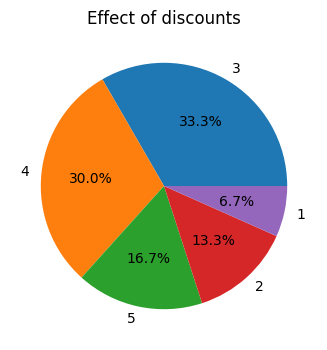

In [133]:
rating_counts = data['Rating1'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,4))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%')
plt.title('Effect of discounts')
plt.show()

Thus most of the people has positive w.r.t sentiment over discount 
46.7% of people are positive
33.3% people are neutral  
20.0% have expressed negative sentiment.

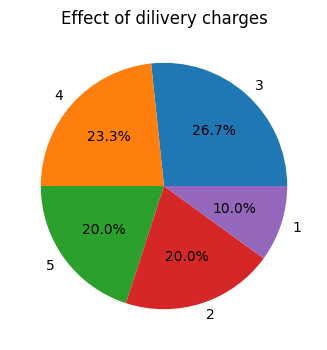

In [134]:
rating_counts = data['Rating2'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,4))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%')
plt.title('Effect of dilivery charges')
plt.show()

Thus most of the people are positive w.r.t effect over dilivery charges 
43.3% of people are positive
26.7% people are neutral  
30.0% have expressed negative sentiment.

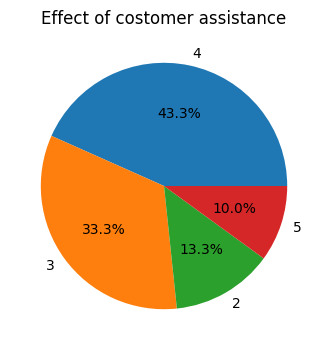

In [135]:
rating_counts = data['Rating3'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,4))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%')
plt.title('Effect of costomer assistance')
plt.show()

Thus most of the people are positive w.r.t effect over coustmer asistance
53.3% of people are positive
33.3% people are neutral  
13.3% have expressed negative sentiment.

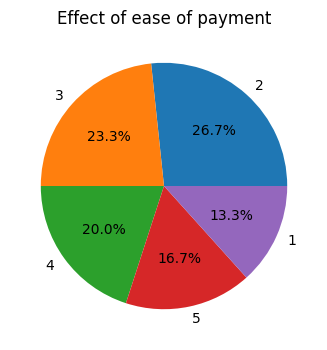

In [136]:
rating_counts = data['Rating4'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,4))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%')
plt.title('Effect of ease of payment')
plt.show()

Thus most of the people are negative w.r.t effect over ease of payment 
36.7% of people are positive
23.3% people are neutral  
40.0% have expressed negative sentiment.

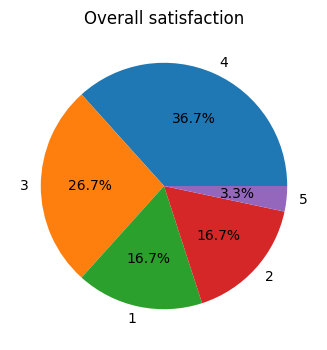

In [137]:
rating_counts = data['Rating5'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,4))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%')
plt.title('Overall satisfaction')
plt.show()

talking about overall satisfaction:
40.0% people are positive
26.7% people are neutral
33.4% people are negative

In [139]:
data['Rating']=data[['Rating1','Rating2','Rating3','Rating4','Rating5']].mean(axis=1)
print(data['Rating'].head())

0    4.0
1    3.6
2    3.2
3    3.6
4    3.4
Name: Rating, dtype: float64


Now lets look at sentiment analysis of Reviews

In [124]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_review(review):
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', review)
    
    # Convert all words to lowercase and split them
    review = review.lower().split()
    
    # Remove stopwords and lemmatize the words
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    
    # Join words back into a single string separated by space
    review = ' '.join(review)
    
    return review

# Apply the cleaning function to the review column
data['Review'] = data['Review'].apply(clean_review)
print(data["Review"].head())


0                            good improved
1                               waste time
2    good way get hold item sold generally
3                   get wide range product
4                                     nice
Name: Review, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


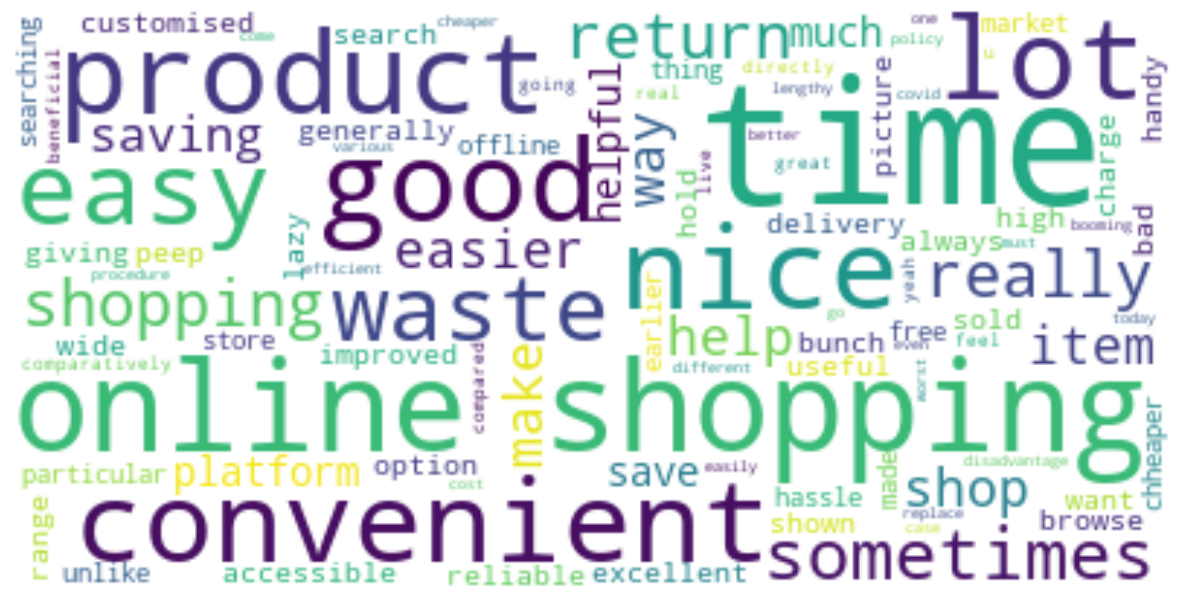

In [125]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [126]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())


                                  Review  Positive  Negative  Neutral
0                          good improved     1.000     0.000    0.000
1                             waste time     0.000     0.737    0.263
2  good way get hold item sold generally     0.326     0.000    0.674
3                 get wide range product     0.000     0.000    1.000
4                                   nice     1.000     0.000    0.000


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [127]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Positive 😊 


In [140]:
sia = SentimentIntensityAnalyzer()
data['review_sentiment'] = data['Review'].apply(lambda review: sia.polarity_scores(review)['compound'])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Rating', 'review_sentiment']] = scaler.fit_transform(data[['Rating', 'review_sentiment']])
data['combined_score'] = (2*data['Rating'] + data['review_sentiment']) / 3
print(data['combined_score'].head())

0    0.902622
1    0.507713
2    0.637385
3    0.617702
4    0.680072
Name: combined_score, dtype: float64
